# Table of Content

1. Introduction
2. Setup and Import
3. Getting to know the Data
4. Visualisation


# Introduction

-> Picture

Success in any financial market requires one to identify solid investments. When a stock or derivative is undervalued, it makes sense to buy. If it's overvalued, perhaps it's time to sell. While these finance decisions were historically made manually by professionals, technology has ushered in new opportunities for retail investors. Data scientists, specifically, may be interested to explore quantitative trading, where decisions are executed programmatically based on predictions from trained models.

There are plenty of existing quantitative trading efforts used to analyze financial markets and formulate investment strategies. To create and execute such a strategy requires both historical and real-time data, which is difficult to obtain especially for retail investors. This competition will provide financial data for the Japanese market, allowing retail investors to analyze the market to the fullest extent.

Japan Exchange Group, Inc. (JPX) is a holding company operating one of the largest stock exchanges in the world, Tokyo Stock Exchange (TSE), and derivatives exchanges Osaka Exchange (OSE) and Tokyo Commodity Exchange (TOCOM). JPX is hosting this competition and is supported by AI technology company AlpacaJapan Co.,Ltd.

This competition on Kaggle will compare our final model against real future returns after the training phase is complete.



## Setup and Import

As always, the first step is to import the required libraries and data. Since we do not want to run the SQL query every time, we can simply import the csv file we created in the first notebook.

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
import numpy as np

from ipywidgets import HTML
from io import BytesIO
import base64

import warnings
warnings.simplefilter("ignore")

# Turn off the max column width so the images won't be truncated
pd.set_option('display.max_colwidth', None)
# Show all Columns
pd.set_option('display.max_columns', None)
 
# Turning off the max column will display all the data
# if gathering into sets / array we might want to restrict to a few items
pd.set_option('display.max_seq_items', 3)


In [2]:
# Import dataframes for Stock Prices
stock_price_df = pd.read_csv('../data/train_files/stock_prices.csv', parse_dates=['Date'])
sec_df = pd.read_csv('../data/train_files/secondary_stock_prices.csv', parse_dates=['Date'])
tra_df = pd.read_csv('../data/train_files/trades.csv', parse_dates=['Date'])

stock_desc_df = pd.read_csv('../data/train_files/stock_price_spec.csv')
stock_list_desc_df = pd.read_csv('../data/train_files/stock_list_spec.csv')
stock_list = pd.read_csv('../data/stock_list.csv')

In [3]:
stock_price_df.head(5)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026


In [4]:
stock_list.head()

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,1.092828e+07,3.365911e+10,True
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False
3,1308,20211230,Nikko Exchange Traded Index Fund TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2053.0,3.736943e+09,7.671945e+12,False
4,1309,20211230,NEXT FUNDS ChinaAMC SSE50 Index Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,44280.0,7.263200e+04,3.216145e+09,False


In [5]:
stock_desc_df 


,Column,Sample value,Type,Addendum,Remarks
0,RowId,20170104_1301,string,NaN,Unique ID of price records
1,Date,2017-01-04 0:00:00,date,NaN,Trade date
2,SecuritiesCode,1301,Int64,NaN,Local securities code
3,Open,2734,float,NaN,first traded price on a day
4,High,2755,float,NaN,highest traded price on a day
5,Low,2730,float,NaN,lowest traded price on a day
6,Close,2742,float,NaN,last traded price on a day
7,Volume,31400,Int64,NaN,number of traded stocks on a day
8,AdjustmentFactor,1,float,NaN,to calculate theoretical price/volume when split/reverse-split happens (NOT including dividend/allotment of shares/)
9,SupervisionFlag,FALSE,boolean,NaN,Flag of Securities Under Supervision & Securities to Be Delisted\nhttps://www.jpx.co.jp/english/listing/market-alerts/supervision/00-archives/index.html )


In [6]:
stock_list_desc_df

,Column,Sample value,Type,Addendum,Remarks
0,SecuritiesCode,1301,Int64,NaN,Local Securities Code
1,EffectiveDate,20211230,date,NaN,the effective date
2,Name,"KYOKUYO CO.,LTD.",string,NaN,Name of security
3,Section/Products,First Section (Domestic),string,NaN,Section/Product
4,NewMarketSegment,Prime Market,string,NaN,New market segment effective from 2022-04-04 (as of 15:30 JST on Mar 11 2022)\nref. https://www.jpx.co.jp/english/equities/market-restructure/market-segments/index.html
5,33SectorCode,50,Int64,NaN,33 Sector Name\n\nref. https://www.jpx.co.jp/english/markets/indices/line-up/files/e_fac_13_sector.pdf
6,33SectorName,"Fishery, Agriculture and Forestry",string,NaN,33 Sector Name\n\nref. https://www.jpx.co.jp/english/markets/indices/line-up/files/e_fac_13_sector.pdf
7,17SectorCode,1,Int64,NaN,17 Sector Code\nref. https://www.jpx.co.jp/english/markets/indices/line-up/files/e_fac_13_sector.pdf
8,17SectorName,FOODS,string,NaN,17 Sector Name\nref. https://www.jpx.co.jp/english/markets/indices/line-up/files/e_fac_13_sector.pdf
9,NewIndexSeriesSizeCode,7,Int64,NaN,TOPIX New Index Series code\n\nref. https://www.jpx.co.jp/english/markets/indices/line-up/files/e_fac_12_size.pdf


## Additional Features

### Metrics
BOP: Balance of Power = (Close price – Open price) / (High price – Low price) <br>
WP: weighted Price = (Close price + Open price + High price + Low price) / 4 <br>
HLr: High-Low-Range = High price – Low price <br>
OCr: Open-Close-Range = Close price – Open price <br>
OC: Open-Close = Close price * Open price <br>
HL: High-Low = High price * Low price <br>
logC: logarithmic scaled Close price <br>
logR: log(Close price) - log(Open price) <br>
OHLCstd: Open, High, Low, Close, standard deviated. <br>
OHLCskew: Open, High, Low, Close, skewed. <br>
OHLCkur: Open, High, Low, Close, kurtosis. <br>
Cpos: = (Close price – Low price) / (High price – Low price) -0.5 <br>
Opos: = (Open price – Low price) / (High price – Low price) -0.5 <br>
bsforce: = Cpos * Volume <br>
    
    
### Weekdays
Weekday = Day of the Week (1-5) <br>
Monday = if Monday == 1 <br>
Tuesday = if Tuesday == 1 <br>
Wednesday = if Wednesday == 1 <br>
Thursday = if Thursday == 1 <br>
Friday = if Fryday == 1 <br>
Date = Date

In [7]:
def FE(stock_price_df):
    stock_price_df['BOP'] = (stock_price_df['Open']-stock_price_df['Close'])/(stock_price_df['High']-stock_price_df['Low'])
    stock_price_df['WP'] = (stock_price_df['Open']+stock_price_df['Close']+stock_price_df['High']+stock_price_df['Low'])/4
    stock_price_df['HLr'] = stock_price_df['High'] - stock_price_df['Low']
    stock_price_df['OCr'] = stock_price_df['Open'] - stock_price_df['Close']
    stock_price_df['OC'] = stock_price_df['Open'] * stock_price_df['Close']
    stock_price_df['HL'] = stock_price_df['High'] * stock_price_df['Low']
    stock_price_df['logC'] = np.log(stock_price_df['Close']+1)
    stock_price_df['logR'] = np.log(stock_price_df['Close'])-np.log(stock_price_df['Open'])
    stock_price_df['OHLCstd'] = stock_price_df[['Open','High','Low','Close']].std(axis=1)
    stock_price_df['OHLCskew'] = stock_price_df[['Open','High','Low','Close']].skew(axis=1)
    stock_price_df['OHLCkur'] = stock_price_df[['Open','High','Low','Close']].kurtosis(axis=1)

    stock_price_df['Cpos'] = (stock_price_df['Close']-stock_price_df['Low'])/(stock_price_df['High']-stock_price_df['Low']) -0.5
    stock_price_df['bsforce'] = stock_price_df['Cpos'] * stock_price_df['Volume']
    stock_price_df['Opos'] = (stock_price_df['Open']-stock_price_df['Low'])/(stock_price_df['High']-stock_price_df['Low']) -0.5
    
    stock_price_df['weekday'] = stock_price_df['Date'].dt.weekday+1
    stock_price_df['Monday'] = np.where(stock_price_df['weekday']==1,1,0)
    stock_price_df['Tuesday'] = np.where(stock_price_df['weekday']==2,1,0)
    stock_price_df['Wednesday'] = np.where(stock_price_df['weekday']==3,1,0)
    stock_price_df['Thursday'] = np.where(stock_price_df['weekday']==4,1,0)
    stock_price_df['Friday'] = np.where(stock_price_df['weekday']==5,1,0)
    stock_price_df['Date'] = pd.to_datetime(stock_price_df['Date'])

    #rolling mean
    stock_price_df['SMA5'] = stock_price_df.Close.rolling(5).mean()
    stock_price_df['SMA20'] = stock_price_df.Close.rolling(20).mean()
    stock_price_df['SMA50'] = stock_price_df.Close.rolling(50).mean()
    stock_price_df['SMA200'] = stock_price_df.Close.rolling(200).mean()
    stock_price_df['SMA500'] = stock_price_df.Close.rolling(500).mean()

    #Exponentially Weighted average
    stock_price_df['EMA5'] = stock_price_df.Close.ewm(span=5, adjust=False).mean()
    stock_price_df['EMA20'] = stock_price_df.Close.ewm(span=20, adjust=False).mean()
    stock_price_df['EMA50'] = stock_price_df.Close.ewm(span=50, adjust=False).mean()
    stock_price_df['EMA200'] = stock_price_df.Close.ewm(span=200, adjust=False).mean()
    stock_price_df['EMA500'] = stock_price_df.Close.ewm(span=500, adjust=False).mean()

    

    return stock_price_df
stock_price_df = FE(stock_price_df)
stock_price_df = pd.merge(stock_price_df,stock_list, on='SecuritiesCode')

In [8]:
stock_price_df.head(10)

,RowId,Date,SecuritiesCode,Open,High,Low,Close_x,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,BOP,WP,HLr,OCr,OC,HL,logC,logR,OHLCstd,OHLCskew,OHLCkur,Cpos,bsforce,Opos,weekday,Monday,Tuesday,Wednesday,Thursday,Friday,SMA5,SMA20,SMA50,SMA200,SMA500,EMA5,EMA20,EMA50,EMA200,EMA500,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close_y,IssuedShares,MarketCapitalization,Universe0
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730,-0.320000,2740.25,25.0,-8.0,7496628.0,7521150.0,7.916807,0.002922,11.026483,0.941530,0.008495,-0.020000,-628.000000,-0.340000,3,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,10928283.0,3.365911e+10,True
1,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,NaN,False,0.002920,0.416667,2740.75,12.0,5.0,7510334.0,7513045.0,7.915348,-0.001824,5.315073,0.198134,-2.215052,-0.250000,-4475.000000,0.166667,4,0,0,0,1,0,1634.4,4667.40,3253.22,NaN,NaN,2469.865742,4128.913255,3611.146767,2591.486142,2244.789563,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,10928283.0,3.365911e+10,True
2,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,NaN,False,-0.001092,-0.250000,2734.50,24.0,-6.0,7491160.0,7463680.0,7.916078,0.002192,10.503968,-1.164860,1.085094,0.333333,6633.333333,0.083333,5,0,0,0,0,1,1646.2,4653.20,3252.34,2236.6775,2038.7184,2478.198372,4120.312180,3608.506609,2593.691422,2246.059723,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,10928283.0,3.365911e+10,True
3,20170110_1301,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,NaN,False,-0.005100,-0.157895,2745.50,19.0,-3.0,7543260.0,7532190.0,7.918992,0.001092,7.937254,-0.703934,1.125220,0.184211,4457.894737,0.026316,2,0,1,0,0,0,1654.0,4516.45,3201.24,2231.0465,2037.7990,2467.890060,4024.784152,3538.924414,2575.661754,2240.805293,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,10928283.0,3.365911e+10,True
4,20170111_1301,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,NaN,False,-0.003295,0.200000,2745.50,15.0,3.0,7543260.0,7532224.0,7.917901,-0.001092,6.350853,-0.843252,0.933953,0.033333,310.000000,0.233333,3,0,0,1,0,0,1662.8,NaN,NaN,NaN,NaN,2464.515692,4017.194394,3530.895281,2555.202645,2224.454374,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,10928283.0,3.365911e+10,True
5,20170112_1301,2017-01-12,1301,2745.0,2747.0,2703.0,2731.0,28700,1.0,NaN,False,-0.006613,0.318182,2731.50,44.0,14.0,7496595.0,7425141.0,7.912789,-0.005113,20.289570,-1.354079,1.265400,0.136364,3913.636364,0.454545,4,0,0,0,1,0,1654.0,NaN,NaN,NaN,NaN,2458.791049,4016.507971,3530.752970,2564.766409,2233.147617,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,10928283.0,3.365911e+10,True
6,20170113_1301,2017-01-13,1301,2707.0,2730.0,2707.0,2722.0,19400,1.0,NaN,False,-0.006657,-0.652174,2716.50,23.0,-15.0,7368454.0,7390110.0,7.909489,0.005526,11.445523,0.405505,-3.706427,0.152174,2952.173913,-0.500000,5,0,0,0,0,1,1640.0,4398.10,NaN,NaN,NaN,2425.478169,3935.117134,3474.914378,2536.401311,2211.646207,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,10928283.0,3.365911e+10,True
7,20170116_1301,2017-01-16,1301,2725.0,2725.0,

In [9]:
df = stock_price_df.drop(columns=['17SectorCode','NewIndexSeriesSizeCode', '33SectorCode', 'ExpectedDividend', 'RowId'])

In [10]:
df.shape

(2332531, 52)

In [11]:
df.head()

,Date,SecuritiesCode,Open,High,Low,Close_x,Volume,AdjustmentFactor,SupervisionFlag,Target,BOP,WP,HLr,OCr,OC,HL,logC,logR,OHLCstd,OHLCskew,OHLCkur,Cpos,bsforce,Opos,weekday,Monday,Tuesday,Wednesday,Thursday,Friday,SMA5,SMA20,SMA50,SMA200,SMA500,EMA5,EMA20,EMA50,EMA200,EMA500,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorName,17SectorName,NewIndexSeriesSize,TradeDate,Close_y,IssuedShares,MarketCapitalization,Universe0
0,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,False,0.000730,-0.320000,2740.25,25.0,-8.0,7496628.0,7521150.0,7.916807,0.002922,11.026483,0.941530,0.008495,-0.020000,-628.000000,-0.340000,3,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,"Fishery, Agriculture and Forestry",FOODS,TOPIX Small 2,20211230.0,3080.0,10928283.0,3.365911e+10,True
1,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,False,0.002920,0.416667,2740.75,12.0,5.0,7510334.0,7513045.0,7.915348,-0.001824,5.315073,0.198134,-2.215052,-0.250000,-4475.000000,0.166667,4,0,0,0,1,0,1634.4,4667.40,3253.22,NaN,NaN,2469.865742,4128.913255,3611.146767,2591.486142,2244.789563,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,"Fishery, Agriculture and Forestry",FOODS,TOPIX Small 2,20211230.0,3080.0,10928283.0,3.365911e+10,True
2,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,False,-0.001092,-0.250000,2734.50,24.0,-6.0,7491160.0,7463680.0,7.916078,0.002192,10.503968,-1.164860,1.085094,0.333333,6633.333333,0.083333,5,0,0,0,0,1,1646.2,4653.20,3252.34,2236.6775,2038.7184,2478.198372,4120.312180,3608.506609,2593.691422,2246.059723,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,"Fishery, Agriculture and Forestry",FOODS,TOPIX Small 2,20211230.0,3080.0,10928283.0,3.365911e+10,True
3,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,False,-0.005100,-0.157895,2745.50,19.0,-3.0,7543260.0,7532190.0,7.918992,0.001092,7.937254,-0.703934,1.125220,0.184211,4457.894737,0.026316,2,0,1,0,0,0,1654.0,4516.45,3201.24,2231.0465,2037.7990,2467.890060,4024.784152,3538.924414,2575.661754,2240.805293,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,"Fishery, Agriculture and Forestry",FOODS,TOPIX Small 2,20211230.0,3080.0,10928283.0,3.365911e+10,True
4,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,False,-0.003295,0.200000,2745.50,15.0,3.0,7543260.0,7532224.0,7.917901,-0.001092,6.350853,-0.843252,0.933953,0.033333,310.000000,0.233333,3,0,0,1,0,0,1662.8,NaN,NaN,NaN,NaN,2464.515692,4017.194394,3530.895281,2555.202645,2224.454374,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,"Fishery, Agriculture and Forestry",FOODS,TOPIX Small 2,20211230.0,3080.0,10928283.0,3.365911e+10,True


In [12]:
df.shape

(2332531, 52)

### Dropping some columns

In [13]:
df. drop(['SupervisionFlag' , 'Name' , 'Section/Products','NewMarketSegment','33SectorName','17SectorName','NewIndexSeriesSize','Universe0'], axis=1, inplace=True)

In [14]:
df.sample(10)

,Date,SecuritiesCode,Open,High,Low,Close_x,Volume,AdjustmentFactor,Target,BOP,WP,HLr,OCr,OC,HL,logC,logR,OHLCstd,OHLCskew,OHLCkur,Cpos,bsforce,Opos,weekday,Monday,Tuesday,Wednesday,Thursday,Friday,SMA5,SMA20,SMA50,SMA200,SMA500,EMA5,EMA20,EMA50,EMA200,EMA500,EffectiveDate,TradeDate,Close_y,IssuedShares,MarketCapitalization
91709,2018-06-15,1942,1246.0,1246.0,1237.0,1237.0,307400,1.0,0.008104,1.000000,1241.50,9.0,9.0,1.541302e+06,1.541302e+06,7.121252,-0.007249,5.196152,0.000000,-6.000000,-0.500000,-153700.000000,0.500000,5,0,0,0,0,1,1879.8,2012.825,2306.930,3144.7525,2745.9418,1866.246507,2043.122266,2378.515312,2882.030339,2897.616038,20211230,20211230.0,857.0,205288338.0,1.759321e+11
877668,2017-11-06,4956,1972.0,2012.0,1972.0,2005.0,64600,1.0,0.001004,-0.825000,1990.25,40.0,-33.0,3.953860e+06,3.967664e+06,7.603898,0.016596,21.266170,0.092980,-5.465601,0.325000,20995.000000,-0.500000,1,1,0,0,0,0,3561.0,3737.450,3032.530,2963.2150,NaN,3235.564964,3786.519700,3326.052162,3004.286899,2875.532123,20211230,20211230.0,1732.0,40707440.0,7.050529e+10
2265134,2019-06-28,6653,793.0,797.0,774.0,775.0,14000,1.0,-0.002618,0.782609,784.75,23.0,18.0,6.145750e+05,6.168780e+05,6.654153,-0.022960,11.954776,0.089989,-5.414744,-0.456522,-6391.304348,0.326087,5,0,0,0,0,1,2234.6,1428.850,2180.360,2418.1500,2564.2788,1748.456291,1827.432735,2025.952920,2276.012107,2397.505244,20211230,20211230.0,1203.0,12603595.0,1.516212e+10
1454789,2018-07-03,7205,1173.0,1177.0,1150.0,1165.0,1516000,1.0,-0.002593,0.296296,1166.25,27.0,8.0,1.366545e+06,1.353550e+06,7.061334,-0.006843,11.926860,-1.077894,0.528797,0.055556,84222.222222,0.351852,2,0,1,0,0,0,2840.5,1818.675,2868.110,2916.9210,2753.0490,2704.735320,2167.228044,2554.109883,2948.173351,2861.639614,20211230,20211230.0,948.0,574580850.0,5.447026e+11
568932,2018-07-27,3900,2040.0,2092.0,2001.0,2029.0,633800,1.0,-0.014477,0.120879,2040.50,91.0,11.0,4.139160e+06,4.186092e+06,7.615791,-0.005407,38.056975,0.888257,1.574349,-0.192308,-121884.615385,-0.071429,5,0,0,0,0,1,1836.2,1600.050,2111.360,2578.6050,NaN,1938.685272,1790.730185,2112.020218,2532.567578,2658.897519,20211230,20211230.0,1215.0,15258360.0,1.853891e+10
1022640,2020-11-10,5932,937.0,973.0,921.0,972.0,123400,1.0,-0.025078,-0.673077,950.75,52.0,-35.0,9.107640e+05,8.961330e+05,6.880384,0.036673,25.953484,-0.317258,-4.183746,0.480769,59326.923077,-0.192308,2,0,1,0,0,0,2028.2,1708.775,1803.530,2634.0665,3038.9488,1528.780772,1744.166453,1894.774866,2534.433830,2824.168385,20211230,20211230.0,724.0,31554629.0,2.284555e+10
2232106,2021-11-24,9983,74300.0,74680.0,72440.0,72890.0,387400,1.0,-0.032942,0.629464,73577.50,2240.0,1410.0,5.415727e+09,5.409819e+09,11.196720,-0.019159,1080.752053,-0.041998,-4.588005,-0.299107,-115874.107143,0.330357,3,0,0,1,0,0,16779.2,6089.500,4239.600,NaN,NaN,25900.432376,9343.957303,5537.987741,3516.985883,2981.547385,20211230,20211230.0,65310.0,106073656.0,6.927670e+12
839434,2018-10-12,4792,2705.0,2776.0,2705.0,2761.0,13800,1.0,-0.016453,-0.788732,2736.75,71.0,-56.0,7.468505e+06,7.509080e+06,7.923710,0.020491,37.169656,0.139111,-5.202293,0.288732,3984.507042,-0.500000,5,0,0,0,0,1,1564.0,2264.665,2657.466,3171.3955,NaN,2062.725559,2206.080732,2778.739616,3169.155935,2982.894900,20211230,20211230.0,1101.0,19896000.0,2.190550e+10
296680,2021-01-21,2749,283.0,292.0,283.0,291.0,124700,1.0,-0.010417,-0.888889,287.25,9.0,-8.0,8.235300e+04,8.263600e+04,5.676754,0.027876,4.924429,0.035589,-5.794877,0.388889,48494.444444,-0.500000,4,0,0,0,1,0,2466.4,2329.700,2757.910,2404.6400,NaN,1925.366877,2406.317424,2570.146834,2564.447527,2614.827412,20211230,20211230.0,246.0,87849400.0,2.161095e+10
1739397,2017-06-05,8097,1057.0,1074.0,1039.0,1067.0,68900,1.0,0.013183,-0.285714,1059.25,35.0,-10.0,1.127819e+06,1.115886e+06,6.973543,0.009416,15.195942,-0.881662,0.197645,0.300000,20670.000000,0.014286,1,1,0,0,0,0,1054.4,1491.350,1870.310,2498.0875,2431.4394,1371.880712,1492.870857,1906.573557,2387.814924,2451.662051,20211230,20211230.0,1335.0,71000

In [15]:
df.head(10)

,Date,SecuritiesCode,Open,High,Low,Close_x,Volume,AdjustmentFactor,Target,BOP,WP,HLr,OCr,OC,HL,logC,logR,OHLCstd,OHLCskew,OHLCkur,Cpos,bsforce,Opos,weekday,Monday,Tuesday,Wednesday,Thursday,Friday,SMA5,SMA20,SMA50,SMA200,SMA500,EMA5,EMA20,EMA50,EMA200,EMA500,EffectiveDate,TradeDate,Close_y,IssuedShares,MarketCapitalization
0,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,0.000730,-0.320000,2740.25,25.0,-8.0,7496628.0,7521150.0,7.916807,0.002922,11.026483,0.941530,0.008495,-0.020000,-628.000000,-0.340000,3,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
1,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,0.002920,0.416667,2740.75,12.0,5.0,7510334.0,7513045.0,7.915348,-0.001824,5.315073,0.198134,-2.215052,-0.250000,-4475.000000,0.166667,4,0,0,0,1,0,1634.4,4667.40,3253.22,NaN,NaN,2469.865742,4128.913255,3611.146767,2591.486142,2244.789563,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
2,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,-0.001092,-0.250000,2734.50,24.0,-6.0,7491160.0,7463680.0,7.916078,0.002192,10.503968,-1.164860,1.085094,0.333333,6633.333333,0.083333,5,0,0,0,0,1,1646.2,4653.20,3252.34,2236.6775,2038.7184,2478.198372,4120.312180,3608.506609,2593.691422,2246.059723,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
3,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,-0.005100,-0.157895,2745.50,19.0,-3.0,7543260.0,7532190.0,7.918992,0.001092,7.937254,-0.703934,1.125220,0.184211,4457.894737,0.026316,2,0,1,0,0,0,1654.0,4516.45,3201.24,2231.0465,2037.7990,2467.890060,4024.784152,3538.924414,2575.661754,2240.805293,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
4,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,-0.003295,0.200000,2745.50,15.0,3.0,7543260.0,7532224.0,7.917901,-0.001092,6.350853,-0.843252,0.933953,0.033333,310.000000,0.233333,3,0,0,1,0,0,1662.8,NaN,NaN,NaN,NaN,2464.515692,4017.194394,3530.895281,2555.202645,2224.454374,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
5,2017-01-12,1301,2745.0,2747.0,2703.0,2731.0,28700,1.0,-0.006613,0.318182,2731.50,44.0,14.0,7496595.0,7425141.0,7.912789,-0.005113,20.289570,-1.354079,1.265400,0.136364,3913.636364,0.454545,4,0,0,0,1,0,1654.0,NaN,NaN,NaN,NaN,2458.791049,4016.507971,3530.752970,2564.766409,2233.147617,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
6,2017-01-13,1301,2707.0,2730.0,2707.0,2722.0,19400,1.0,-0.006657,-0.652174,2716.50,23.0,-15.0,7368454.0,7390110.0,7.909489,0.005526,11.445523,0.405505,-3.706427,0.152174,2952.173913,-0.500000,5,0,0,0,0,1,1640.0,4398.10,NaN,NaN,NaN,2425.478169,3935.117134,3474.914378,2536.401311,2211.646207,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
7,2017-01-16,1301,2725.0,2725.0,2696.0,2704.0,20100,1.0,0.002978,0.724138,2712.50,29.0,21.0,7368400.0,7346600.0,7.902857,-0.007736,14.798649,-0.246845,-4.592189,-0.224138,-4505.172414,0.500000,1,1,0,0,0,0,1641.0,4440.35,3160.66,NaN,NaN,2433.051968,3964.480051,3485.821455,2532.458875,2210.299936,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
8,2017-01-17,1301,2702.0,2704.0,2682.0,2686.0,18400,1.0,0.001856,0.727273,2693.50,22.0,16.0,7257572.0,7252128.0,7.896181,-0.005939,11.120552,-0.082895,-5.211209,-0.318182,-5854.545455,0.409091,2,0,1,0,0,0,1623.4,NaN,NaN,NaN,NaN,2408.784291,3931.891025,3466.126939,2530.722187,2205.466358,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
9,2017-01-18,1301,2689.0,2695.0,2681.0,2694.0,12100,1.0,0.014079,-0.357143,2689.75,14.0,-5.0,7244166.0,7225295.0,7.899153,0.001858,6.396614,-1.143362,0.333846,0.428571,5185.714286,0.071429,3,0,0,1,0,0,1617.4,NaN,NaN,NaN,NaN,2388.918390,3872.753331,3416.969658,2489.506030,2168.967363,20211230,20211230.0,3080.0,10928283.0,3.365911e+10


#### Subset of Main dataset

In [16]:
df_sub = df.iloc[0:3000,:]

In [17]:
df_sub.shape

(3000, 44)

In [18]:
df_sub.head(10)

,Date,SecuritiesCode,Open,High,Low,Close_x,Volume,AdjustmentFactor,Target,BOP,WP,HLr,OCr,OC,HL,logC,logR,OHLCstd,OHLCskew,OHLCkur,Cpos,bsforce,Opos,weekday,Monday,Tuesday,Wednesday,Thursday,Friday,SMA5,SMA20,SMA50,SMA200,SMA500,EMA5,EMA20,EMA50,EMA200,EMA500,EffectiveDate,TradeDate,Close_y,IssuedShares,MarketCapitalization
0,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,0.000730,-0.320000,2740.25,25.0,-8.0,7496628.0,7521150.0,7.916807,0.002922,11.026483,0.941530,0.008495,-0.020000,-628.000000,-0.340000,3,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
1,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,0.002920,0.416667,2740.75,12.0,5.0,7510334.0,7513045.0,7.915348,-0.001824,5.315073,0.198134,-2.215052,-0.250000,-4475.000000,0.166667,4,0,0,0,1,0,1634.4,4667.40,3253.22,NaN,NaN,2469.865742,4128.913255,3611.146767,2591.486142,2244.789563,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
2,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,-0.001092,-0.250000,2734.50,24.0,-6.0,7491160.0,7463680.0,7.916078,0.002192,10.503968,-1.164860,1.085094,0.333333,6633.333333,0.083333,5,0,0,0,0,1,1646.2,4653.20,3252.34,2236.6775,2038.7184,2478.198372,4120.312180,3608.506609,2593.691422,2246.059723,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
3,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,-0.005100,-0.157895,2745.50,19.0,-3.0,7543260.0,7532190.0,7.918992,0.001092,7.937254,-0.703934,1.125220,0.184211,4457.894737,0.026316,2,0,1,0,0,0,1654.0,4516.45,3201.24,2231.0465,2037.7990,2467.890060,4024.784152,3538.924414,2575.661754,2240.805293,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
4,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,-0.003295,0.200000,2745.50,15.0,3.0,7543260.0,7532224.0,7.917901,-0.001092,6.350853,-0.843252,0.933953,0.033333,310.000000,0.233333,3,0,0,1,0,0,1662.8,NaN,NaN,NaN,NaN,2464.515692,4017.194394,3530.895281,2555.202645,2224.454374,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
5,2017-01-12,1301,2745.0,2747.0,2703.0,2731.0,28700,1.0,-0.006613,0.318182,2731.50,44.0,14.0,7496595.0,7425141.0,7.912789,-0.005113,20.289570,-1.354079,1.265400,0.136364,3913.636364,0.454545,4,0,0,0,1,0,1654.0,NaN,NaN,NaN,NaN,2458.791049,4016.507971,3530.752970,2564.766409,2233.147617,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
6,2017-01-13,1301,2707.0,2730.0,2707.0,2722.0,19400,1.0,-0.006657,-0.652174,2716.50,23.0,-15.0,7368454.0,7390110.0,7.909489,0.005526,11.445523,0.405505,-3.706427,0.152174,2952.173913,-0.500000,5,0,0,0,0,1,1640.0,4398.10,NaN,NaN,NaN,2425.478169,3935.117134,3474.914378,2536.401311,2211.646207,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
7,2017-01-16,1301,2725.0,2725.0,2696.0,2704.0,20100,1.0,0.002978,0.724138,2712.50,29.0,21.0,7368400.0,7346600.0,7.902857,-0.007736,14.798649,-0.246845,-4.592189,-0.224138,-4505.172414,0.500000,1,1,0,0,0,0,1641.0,4440.35,3160.66,NaN,NaN,2433.051968,3964.480051,3485.821455,2532.458875,2210.299936,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
8,2017-01-17,1301,2702.0,2704.0,2682.0,2686.0,18400,1.0,0.001856,0.727273,2693.50,22.0,16.0,7257572.0,7252128.0,7.896181,-0.005939,11.120552,-0.082895,-5.211209,-0.318182,-5854.545455,0.409091,2,0,1,0,0,0,1623.4,NaN,NaN,NaN,NaN,2408.784291,3931.891025,3466.126939,2530.722187,2205.466358,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
9,2017-01-18,1301,2689.0,2695.0,2681.0,2694.0,12100,1.0,0.014079,-0.357143,2689.75,14.0,-5.0,7244166.0,7225295.0,7.899153,0.001858,6.396614,-1.143362,0.333846,0.428571,5185.714286,0.071429,3,0,0,1,0,0,1617.4,NaN,NaN,NaN,NaN,2388.918390,3872.753331,3416.969658,2489.506030,2168.967363,20211230,20211230.0,3080.0,10928283.0,3.365911e+10


In [19]:
df_sub.sample(10)

,Date,SecuritiesCode,Open,High,Low,Close_x,Volume,AdjustmentFactor,Target,BOP,WP,HLr,OCr,OC,HL,logC,logR,OHLCstd,OHLCskew,OHLCkur,Cpos,bsforce,Opos,weekday,Monday,Tuesday,Wednesday,Thursday,Friday,SMA5,SMA20,SMA50,SMA200,SMA500,EMA5,EMA20,EMA50,EMA200,EMA500,EffectiveDate,TradeDate,Close_y,IssuedShares,MarketCapitalization
2168,2020-12-17,1332,432.0,432.0,424.0,425.0,1813400,1.0,-0.002336,0.875000,428.25,8.0,7.0,183600.0,183168.0,6.054439,-0.016336,4.349329,-0.045579,-5.737429,-0.375000,-6.800250e+05,0.500000,4,0,0,0,1,0,1636.0,6768.50,4311.92,NaN,NaN,2037.969578,5235.801417,4796.379593,3488.087677,2920.361203,20211230,20211230.0,543.0,312430277.0,1.696496e+11
1304,2017-06-02,1332,591.0,595.0,590.0,594.0,1817600,1.0,0.005102,-0.600000,592.50,5.0,-3.0,351054.0,351050.0,6.388561,0.005063,2.380476,0.000000,-4.339100,0.300000,5.452800e+05,-0.300000,5,0,0,0,0,1,1676.8,4218.05,3146.58,NaN,NaN,1880.099183,3528.786019,3364.191844,2572.622009,2265.295726,20211230,20211230.0,543.0,312430277.0,1.696496e+11
1924,2019-12-16,1332,672.0,689.0,666.0,670.0,6891600,1.0,-0.023988,0.086957,674.25,23.0,2.0,450240.0,458874.0,6.508769,-0.002981,10.144785,1.634233,2.964822,-0.326087,-2.247261e+06,-0.239130,1,1,0,0,0,0,1639.4,5671.80,3893.40,3195.660,2763.0256,1967.396242,4515.595222,4287.503078,3441.728439,2970.020981,20211230,20211230.0,543.0,312430277.0,1.696496e+11
1949,2020-01-27,1332,591.0,597.0,584.0,596.0,2581300,1.0,0.011647,-0.384615,592.00,13.0,-5.0,352236.0,348648.0,6.391917,0.008425,5.944185,-1.028435,-0.208793,0.423077,1.092088e+06,0.038462,1,1,0,0,0,0,1611.4,5438.85,3787.36,3130.035,2699.6768,1902.292284,4334.132139,4150.050139,3365.627880,2911.585925,20211230,20211230.0,543.0,312430277.0,1.696496e+11
949,2020-11-24,1301,2850.0,2860.0,2806.0,2807.0,20100,1.0,-0.007771,0.796296,2830.75,54.0,43.0,7999950.0,8025160.0,7.940228,-0.015203,28.300471,0.105917,-5.379542,-0.481481,-9.677778e+03,0.314815,2,0,1,0,0,0,1718.6,6537.90,4244.82,NaN,NaN,2752.179537,5517.855469,4808.065203,3441.444567,2865.342725,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
476,2018-12-06,1301,3195.0,3200.0,3170.0,3180.0,19800,1.0,-0.037209,0.500000,3186.25,30.0,15.0,10160100.0,10144000.0,8.064951,-0.004706,13.768926,-0.323231,-3.032967,-0.166667,-3.300000e+03,0.333333,4,0,0,0,1,0,1951.4,5715.00,3934.56,3085.370,2649.7676,2886.471771,4976.035300,4388.221531,3329.683707,2877.332140,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
1644,2018-10-18,1332,737.0,738.0,730.0,730.0,2437300,1.0,0.002717,0.875000,733.75,8.0,7.0,538010.0,538740.0,6.594413,-0.009543,4.349329,0.045579,-5.737429,-0.500000,-1.218650e+06,0.375000,4,0,0,0,1,0,1918.4,5579.00,3854.78,NaN,NaN,2177.267058,4524.179971,4216.081044,3327.728828,2928.159346,20211230,20211230.0,543.0,312430277.0,1.696496e+11
553,2019-04-04,1301,2793.0,2801.0,2766.0,2770.0,32700,1.0,0.002526,0.657143,2782.50,35.0,23.0,7736610.0,7747566.0,7.926964,-0.008269,17.136705,0.138302,-4.694188,-0.385714,-1.261286e+04,0.271429,4,0,0,0,1,0,1728.8,NaN,NaN,NaN,NaN,2608.726123,4738.393056,4200.619316,3234.408607,2804.089376,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
1269,2017-04-11,1332,526.0,529.0,521.0,528.0,2668000,1.0,0.015152,-0.250000,526.00,8.0,-2.0,277728.0,275609.0,6.270988,0.003795,3.559026,-1.330938,1.500000,0.375000,1.000500e+06,0.125000,2,0,1,0,0,0,1546.2,3911.25,2943.64,NaN,NaN,1724.404391,3276.650179,3130.521048,2391.519963,2098.547250,20211230,20211230.0,543.0,312430277.0,1.696496e+11
83,2017-05-08,1301,2973.0,2987.0,2961.0,2985.0,35700,1.0,0.007073,-0.461538,2976.50,26.0,-12.0,8874405.0,8844507.0,8.001690,0.004028,12.041595,-0.761728,-1.570511,0.423077,1.510385e+04,-0.038462,1,1,0,0,0,0,1720.4,4159.00,3116.84,NaN,NaN,2415.656100,3710.082244,3354.319224,2497.541209,2189.020801,20211230,20211230.0,3080.0,10928283.0,3.365911e+10


### Arima model

In [20]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [21]:
df_sub.head(5)

,Date,SecuritiesCode,Open,High,Low,Close_x,Volume,AdjustmentFactor,Target,BOP,WP,HLr,OCr,OC,HL,logC,logR,OHLCstd,OHLCskew,OHLCkur,Cpos,bsforce,Opos,weekday,Monday,Tuesday,Wednesday,Thursday,Friday,SMA5,SMA20,SMA50,SMA200,SMA500,EMA5,EMA20,EMA50,EMA200,EMA500,EffectiveDate,TradeDate,Close_y,IssuedShares,MarketCapitalization
0,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,0.000730,-0.320000,2740.25,25.0,-8.0,7496628.0,7521150.0,7.916807,0.002922,11.026483,0.941530,0.008495,-0.020000,-628.000000,-0.340000,3,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
1,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,0.002920,0.416667,2740.75,12.0,5.0,7510334.0,7513045.0,7.915348,-0.001824,5.315073,0.198134,-2.215052,-0.250000,-4475.000000,0.166667,4,0,0,0,1,0,1634.4,4667.40,3253.22,NaN,NaN,2469.865742,4128.913255,3611.146767,2591.486142,2244.789563,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
2,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,-0.001092,-0.250000,2734.50,24.0,-6.0,7491160.0,7463680.0,7.916078,0.002192,10.503968,-1.164860,1.085094,0.333333,6633.333333,0.083333,5,0,0,0,0,1,1646.2,4653.20,3252.34,2236.6775,2038.7184,2478.198372,4120.312180,3608.506609,2593.691422,2246.059723,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
3,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,-0.005100,-0.157895,2745.50,19.0,-3.0,7543260.0,7532190.0,7.918992,0.001092,7.937254,-0.703934,1.125220,0.184211,4457.894737,0.026316,2,0,1,0,0,0,1654.0,4516.45,3201.24,2231.0465,2037.7990,2467.890060,4024.784152,3538.924414,2575.661754,2240.805293,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
4,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,-0.003295,0.200000,2745.50,15.0,3.0,7543260.0,7532224.0,7.917901,-0.001092,6.350853,-0.843252,0.933953,0.033333,310.000000,0.233333,3,0,0,1,0,0,1662.8,NaN,NaN,NaN,NaN,2464.515692,4017.194394,3530.895281,2555.202645,2224.454374,20211230,20211230.0,3080.0,10928283.0,3.365911e+10


In [22]:
#features = ['Open','High','Low','Volume','AdjustmentFactor','Target','BOP','WP']

In [23]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  3000 non-null   datetime64[ns]
 1   SecuritiesCode        3000 non-null   int64         
 2   Open                  2998 non-null   float64       
 3   High                  2998 non-null   float64       
 4   Low                   2998 non-null   float64       
 5   Close_x               2998 non-null   float64       
 6   Volume                3000 non-null   int64         
 7   AdjustmentFactor      3000 non-null   float64       
 8   Target                3000 non-null   float64       
 9   BOP                   2998 non-null   float64       
 10  WP                    2998 non-null   float64       
 11  HLr                   2998 non-null   float64       
 12  OCr                   2998 non-null   float64       
 13  OC                

In [24]:
df_sub. isnull(). sum()

Date                       0
SecuritiesCode             0
Open                       2
High                       2
Low                        2
Close_x                    2
Volume                     0
AdjustmentFactor           0
Target                     0
BOP                        2
WP                         2
HLr                        2
OCr                        2
OC                         2
HL                         2
logC                       2
logR                       2
OHLCstd                    2
OHLCskew                   2
OHLCkur                    2
Cpos                       2
bsforce                    2
Opos                       2
weekday                    0
Monday                     0
Tuesday                    0
Wednesday                  0
Thursday                   0
Friday                     0
SMA5                       7
SMA20                    544
SMA50                    742
SMA200                  2061
SMA500                  2136
EMA5          

In [25]:
df_sub['Open'] = df_sub['Open'].interpolate()
df_sub['High'] = df_sub['High'].interpolate()
df_sub['Low'] = df_sub['Low'].interpolate()
df_sub['Close_x'] = df_sub['Close_x'].interpolate()
df_sub['BOP'] = df_sub['BOP'].interpolate()
df_sub['WP'] = df_sub['WP'].interpolate()
df_sub['HLr'] = df_sub['HLr'].interpolate()
df_sub['OCr'] = df_sub['OCr'].interpolate()
df_sub['OC'] = df_sub['OC'].interpolate()
df_sub['HL'] = df_sub['HL'].interpolate()
df_sub['logC'] = df_sub['logC'].interpolate()
df_sub['logR'] = df_sub['logR'].interpolate()
df_sub['OHLCstd'] = df_sub['OHLCstd'].interpolate()
df_sub['OHLCskew'] = df_sub['OHLCskew'].interpolate()
df_sub['OHLCkur'] = df_sub['OHLCkur'].interpolate()
df_sub['Cpos'] = df_sub['Cpos'].interpolate()
df_sub['bsforce'] = df_sub['bsforce'].interpolate()
df_sub['Opos'] = df_sub['Opos'].interpolate()
df_sub['SMA5'] = df_sub['SMA5'].interpolate()
df_sub['SMA20'] = df_sub['SMA20'].interpolate()
df_sub['SMA50'] = df_sub['SMA50'].interpolate()
df_sub['SMA200'] = df_sub['SMA200'].interpolate()
df_sub['SMA500'] = df_sub['SMA500'].interpolate()

In [26]:
df_sub. isnull(). sum()

Date                    0
SecuritiesCode          0
Open                    0
High                    0
Low                     0
Close_x                 0
Volume                  0
AdjustmentFactor        0
Target                  0
BOP                     0
WP                      0
HLr                     0
OCr                     0
OC                      0
HL                      0
logC                    0
logR                    0
OHLCstd                 0
OHLCskew                0
OHLCkur                 0
Cpos                    0
bsforce                 0
Opos                    0
weekday                 0
Monday                  0
Tuesday                 0
Wednesday               0
Thursday                0
Friday                  0
SMA5                    1
SMA20                   1
SMA50                   1
SMA200                  2
SMA500                  2
EMA5                    0
EMA20                   0
EMA50                   0
EMA200                  0
EMA500      

In [27]:
df_sub.head(10)

,Date,SecuritiesCode,Open,High,Low,Close_x,Volume,AdjustmentFactor,Target,BOP,WP,HLr,OCr,OC,HL,logC,logR,OHLCstd,OHLCskew,OHLCkur,Cpos,bsforce,Opos,weekday,Monday,Tuesday,Wednesday,Thursday,Friday,SMA5,SMA20,SMA50,SMA200,SMA500,EMA5,EMA20,EMA50,EMA200,EMA500,EffectiveDate,TradeDate,Close_y,IssuedShares,MarketCapitalization
0,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,0.000730,-0.320000,2740.25,25.0,-8.0,7496628.0,7521150.0,7.916807,0.002922,11.026483,0.941530,0.008495,-0.020000,-628.000000,-0.340000,3,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
1,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,0.002920,0.416667,2740.75,12.0,5.0,7510334.0,7513045.0,7.915348,-0.001824,5.315073,0.198134,-2.215052,-0.250000,-4475.000000,0.166667,4,0,0,0,1,0,1634.4,4667.40,3253.220,NaN,NaN,2469.865742,4128.913255,3611.146767,2591.486142,2244.789563,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
2,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,-0.001092,-0.250000,2734.50,24.0,-6.0,7491160.0,7463680.0,7.916078,0.002192,10.503968,-1.164860,1.085094,0.333333,6633.333333,0.083333,5,0,0,0,0,1,1646.2,4653.20,3252.340,2236.677500,2038.718400,2478.198372,4120.312180,3608.506609,2593.691422,2246.059723,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
3,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,-0.005100,-0.157895,2745.50,19.0,-3.0,7543260.0,7532190.0,7.918992,0.001092,7.937254,-0.703934,1.125220,0.184211,4457.894737,0.026316,2,0,1,0,0,0,1654.0,4516.45,3201.240,2231.046500,2037.799000,2467.890060,4024.784152,3538.924414,2575.661754,2240.805293,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
4,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,-0.003295,0.200000,2745.50,15.0,3.0,7543260.0,7532224.0,7.917901,-0.001092,6.350853,-0.843252,0.933953,0.033333,310.000000,0.233333,3,0,0,1,0,0,1662.8,4477.00,3191.095,2227.219885,2034.955523,2464.515692,4017.194394,3530.895281,2555.202645,2224.454374,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
5,2017-01-12,1301,2745.0,2747.0,2703.0,2731.0,28700,1.0,-0.006613,0.318182,2731.50,44.0,14.0,7496595.0,7425141.0,7.912789,-0.005113,20.289570,-1.354079,1.265400,0.136364,3913.636364,0.454545,4,0,0,0,1,0,1654.0,4437.55,3180.950,2223.393269,2032.112046,2458.791049,4016.507971,3530.752970,2564.766409,2233.147617,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
6,2017-01-13,1301,2707.0,2730.0,2707.0,2722.0,19400,1.0,-0.006657,-0.652174,2716.50,23.0,-15.0,7368454.0,7390110.0,7.909489,0.005526,11.445523,0.405505,-3.706427,0.152174,2952.173913,-0.500000,5,0,0,0,0,1,1640.0,4398.10,3170.805,2219.566654,2029.268569,2425.478169,3935.117134,3474.914378,2536.401311,2211.646207,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
7,2017-01-16,1301,2725.0,2725.0,2696.0,2704.0,20100,1.0,0.002978,0.724138,2712.50,29.0,21.0,7368400.0,7346600.0,7.902857,-0.007736,14.798649,-0.246845,-4.592189,-0.224138,-4505.172414,0.500000,1,1,0,0,0,0,1641.0,4440.35,3160.660,2215.740038,2026.425092,2433.051968,3964.480051,3485.821455,2532.458875,2210.299936,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
8,2017-01-17,1301,2702.0,2704.0,2682.0,2686.0,18400,1.0,0.001856,0.727273,2693.50,22.0,16.0,7257572.0,7252128.0,7.896181,-0.005939,11.120552,-0.082895,-5.211209,-0.318182,-5854.545455,0.409091,2,0,1,0,0,0,1623.4,4421.18,3150.096,2211.913423,2023.581615,2408.784291,3931.891025,3466.126939,2530.722187,2205.466358,20211230,20211230.0,3080.0,10928283.0,3.365911e+10
9,2017-01-18,1301,2689.0,2695.0,2681.0,2694.0,12100,1.0,0.014079,-0.357143,2689.75,14.0,-5.0,7244166.0,7225295.0,7.899153,0.001858,6.396614,-1.143362,0.333846,0.428571,5185.714286,0.071429,3,0,0,1,0,0,1617.4,4402.01,3139.532,2208.086808,2020.738138,2388.918390,3872.753331,3416.969658,2489.506030,2168.967363,20211230,20211230.0,3080.0,10928283.0,3.365911e+10


In [28]:
#train_test_split_ratio = int(len(df_sub)*0.8)
#train_data, test_data = df_sub[:train_test_split_ratio], df_sub[train_test_split_ratio:]


In [29]:
#features = ['Open','High','Low','Volume','AdjustmentFactor','Target','BOP','WP']

In [30]:
# Unix-time to 
df_sub.Date = pd.to_datetime(df_sub.Date, unit='s')

# Resampling to daily frequency
df_sub.index = df_sub.Date
df_sub = df_sub.resample('D').mean()

# Resampling to monthly frequency
df_sub_month = df_sub.resample('M').mean()

# Resampling to annual frequency
df_sub_year = df_sub.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_sub_Q = df_sub.resample('Q-DEC').mean()

In [31]:
df_sub.head(10)

,SecuritiesCode,Open,High,Low,Close_x,Volume,AdjustmentFactor,Target,BOP,WP,HLr,OCr,OC,HL,logC,logR,OHLCstd,OHLCskew,OHLCkur,Cpos,bsforce,Opos,weekday,Monday,Tuesday,Wednesday,Thursday,Friday,SMA5,SMA20,SMA50,SMA200,SMA500,EMA5,EMA20,EMA50,EMA200,EMA500,EffectiveDate,TradeDate,Close_y,IssuedShares,MarketCapitalization
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-04,1322.0,2150.666667,2180.333333,2144.333333,2174.333333,1.033567e+06,1.0,0.006403,-0.469304,2162.416667,36.000000,-23.666667,5.977485e+06,5.974946e+06,7.446761,0.009019,18.074122,0.293704,-1.861288,0.198462,152558.615385,-0.270842,3.0,0.0,0.0,1.0,0.0,0.0,1670.900000,5124.162500,3507.070000,2521.715000,2232.499600,2391.962963,2625.579743,2692.472382,2729.222560,2736.856509,20211230.0,20211230.0,2009.333333,125338490.0,1.099829e+11
2017-01-05,1322.0,2180.000000,2195.000000,2165.000000,2185.333333,8.379000e+05,1.0,-0.010131,0.186508,2181.333333,30.000000,-5.333333,6.105493e+06,6.089488e+06,7.448649,-0.000373,13.221514,-0.277840,-2.010586,-0.029762,-59907.738095,0.156746,4.0,0.0,0.0,0.0,1.0,0.0,1658.066667,4627.633333,3208.826667,2382.542500,2135.654500,2204.349967,3885.687694,3528.426490,2580.314254,2241.673562,20211230.0,20211230.0,2009.333333,125338490.0,1.099829e+11
2017-01-06,1322.0,2188.666667,2203.333333,2177.666667,2195.000000,7.670667e+05,1.0,-0.010854,-0.330128,2191.166667,25.666667,-6.333333,6.164578e+06,6.160156e+06,7.455012,0.005911,11.105229,-0.348137,-0.575220,0.252137,301975.213675,-0.077991,5.0,0.0,0.0,0.0,0.0,1.0,1670.933333,4613.683333,3208.440000,2241.139167,2038.779067,2213.732188,3878.937966,3526.329370,2582.610202,2242.983864,20211230.0,20211230.0,2009.333333,125338490.0,1.099829e+11
2017-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-10,1322.0,2182.666667,2196.666667,2172.000000,2181.666667,9.979333e+05,1.0,-0.007648,0.150146,2183.250000,24.666667,1.000000,6.104779e+06,6.117509e+06,7.444788,-0.005582,10.856725,0.204109,-0.684706,-0.124708,-404331.257310,0.025439,2.0,0.0,1.0,0.0,0.0,0.0,1672.866667,4476.783333,3156.880000,2235.369833,2037.807000,2200.181894,3790.321819,3458.649497,2564.557446,2237.669280,20211230.0,20211230.0,2009.333333,125338490.0,1.099829e+11
2017-01-11,1322.0,2172.333333,2186.333333,2151.000000,2161.000000,8.387000e+05,1.0,0.009657,0.352652,2167.666667,35.333333,11.333333,6.025412e+06,6.037437e+06,7.433862,-0.006567,15.321555,-0.052474,-1.137126,-0.178283,-259519.393939,0.174369,3.0,0.0,0.0,1.0,0.0,0.0,1671.466667,4437.827778,3146.898333,2231.536679,2034.959728,2190.585117,3781.300429,3450.046841,2544.075994,2221.293109,20211230.0,20211230.0,2009.333333,125338490.0,1.099829e+11
2017-01-12,1322.0,2161.000000,2167.666667,2135.333333,2151.666667,9.284667e+05,1.0,-0.010214,0.378497,2153.916667,32.333333,9.333333,5.975242e+06,5.946350e+06,7.426175,-0.007698,14.430167,-0.543030,-0.806047,-0.095571,-362499.300699,0.282925,4.0,0.0,0.0,0.0,1.0,0.0,1662.400000,4398.872222,3136.916667,2227.703526,2032.112456,2184.334442,3779.974356,3449.613999,2553.468923,2229.921137,20211230.0,20211230.0,2009.333333,125338490.0,1.099829e+11


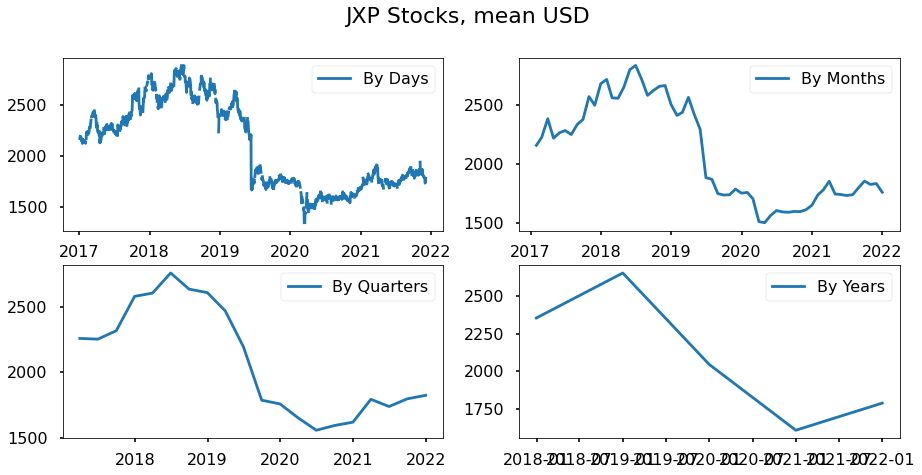

In [32]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('JXP Stocks, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df_sub.Close_x, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_sub_month.Close_x, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_sub_Q.Close_x, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_sub_year.Close_x, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

#### Stationarity check and STL-decomposition of the series

Dickey–Fuller test: p=0.785512


<Figure size 1080x504 with 0 Axes>

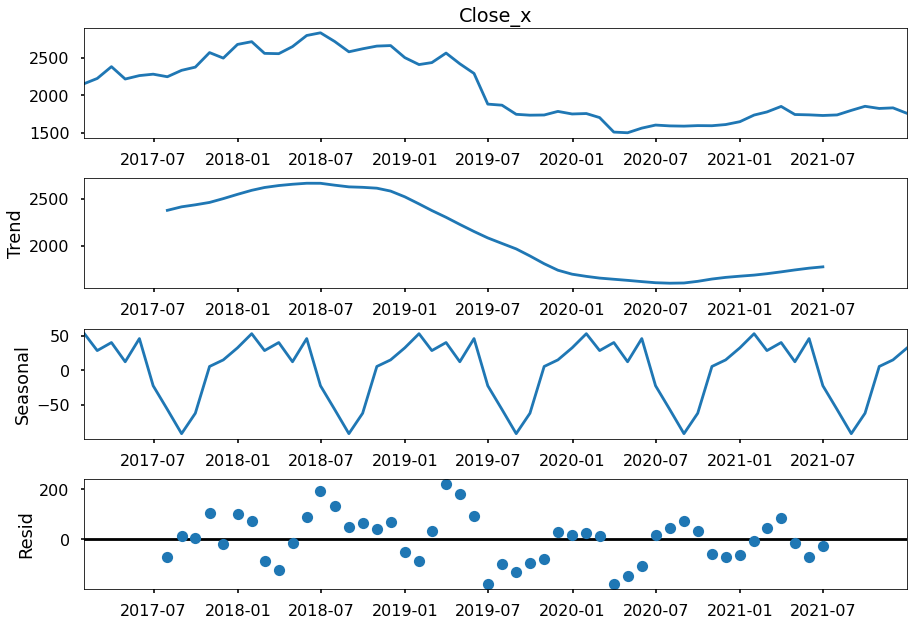

In [33]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(df_sub_month.Close_x).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_sub_month.Close_x)[1])
plt.show()

The series are stationary.

#### Box-Cox Transformations

In [34]:
# Box-Cox Transformations
df_sub_month['Close_x_box'], lmbda = stats.boxcox(df_sub_month.Close_x)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_sub_month.Close_x)[1])

Dickey–Fuller test: p=0.785512


Our series is still stationary

#### Seasonal differentiation
lets check this seasonal differentiation

In [35]:
# Seasonal differentiation
df_sub_month['Close_x_box_diff'] = df_sub_month.Close_x_box - df_sub_month.Close_x_box.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_sub_month.Close_x_box_diff[12:])[1])

Dickey–Fuller test: p=0.000098


The series is not stationary

#### Regular differentiation

Dickey–Fuller test: p=0.000006


<Figure size 1080x504 with 0 Axes>

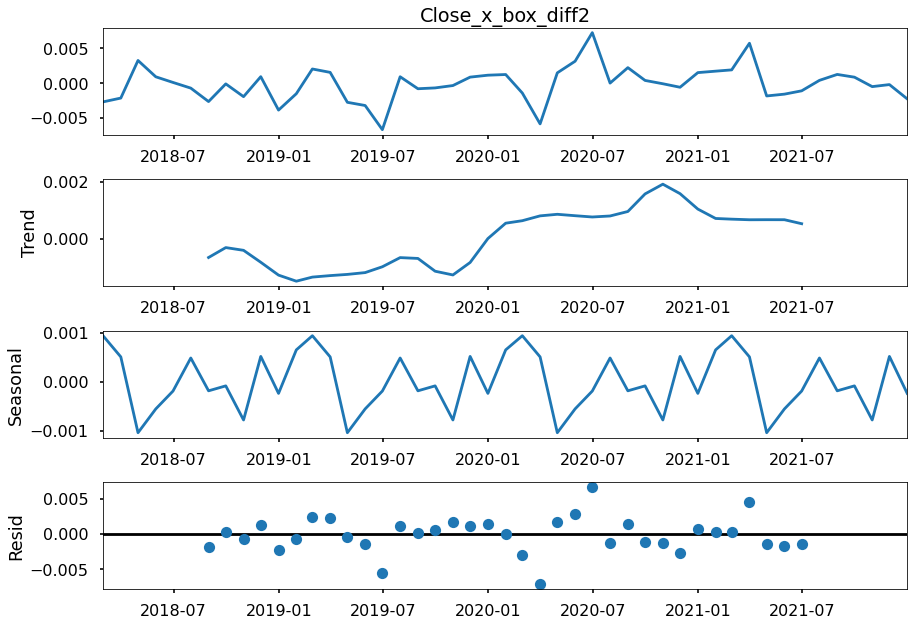

In [36]:
# Regular differentiation
df_sub_month['Close_x_box_diff2'] = df_sub_month.Close_x_box_diff - df_sub_month.Close_x_box_diff.shift(1)
plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(df_sub_month.Close_x_box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_sub_month.Close_x_box_diff2[13:])[1])

plt.show()

The series are stationary.

### Model Selection

In [37]:
df_sub_month.Close_x_box_diff2[13:].values.squeeze().shape

(47,)

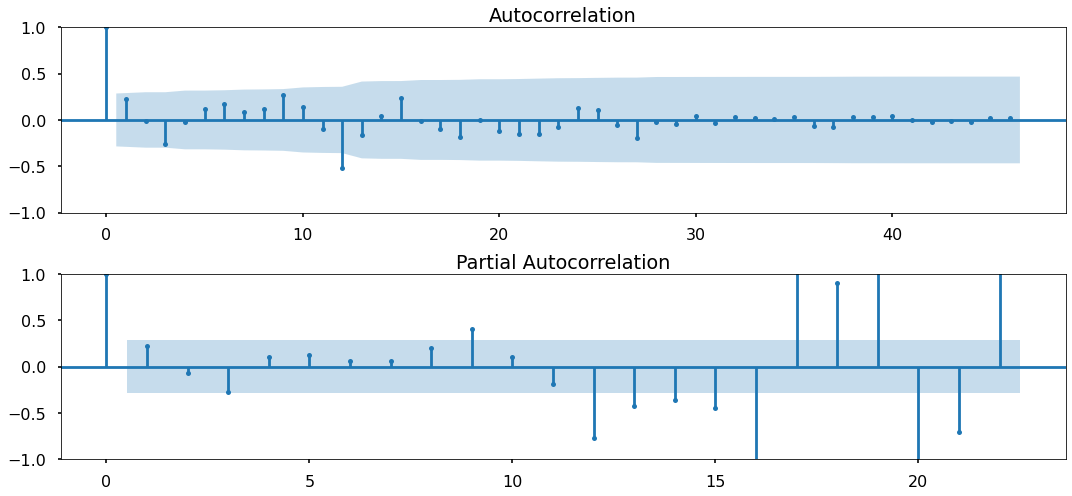

In [38]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_sub_month.Close_x_box_diff2[13:].values.squeeze(), lags=46, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_sub_month.Close_x_box_diff2[13:].values.squeeze(), lags=22, ax=ax)
plt.tight_layout()
plt.show()

In [39]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_sub_month.Close_x_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [40]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

        parameters         aic
4   (0, 0, 2, ...) -447.066530
22  (1, 0, 2, ...) -446.737104
10  (0, 1, 2, ...) -446.241926
16  (0, 2, 2, ...) -445.017161
28  (1, 1, 2, ...) -444.835717
                                     SARIMAX Results                                      
Dep. Variable:                        Close_x_box   No. Observations:                   60
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                 226.533
Date:                            Mon, 23 May 2022   AIC                           -447.067
Time:                                    17:44:11   BIC                           -441.516
Sample:                                01-31-2017   HQIC                          -444.978
                                     - 12-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------

#### Analysis of residues

Dickey–Fuller test:: p=0.000001


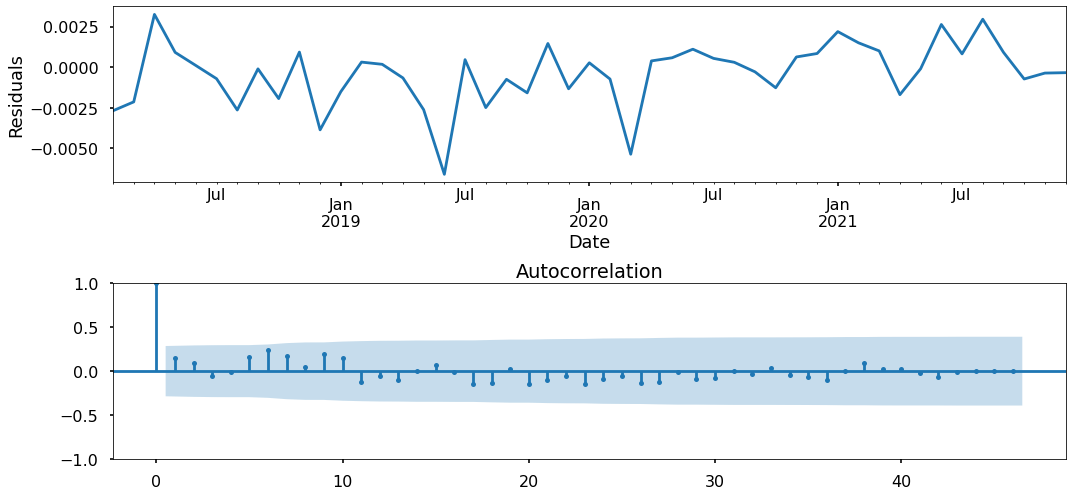

In [41]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=46, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

### Prediction


In [42]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

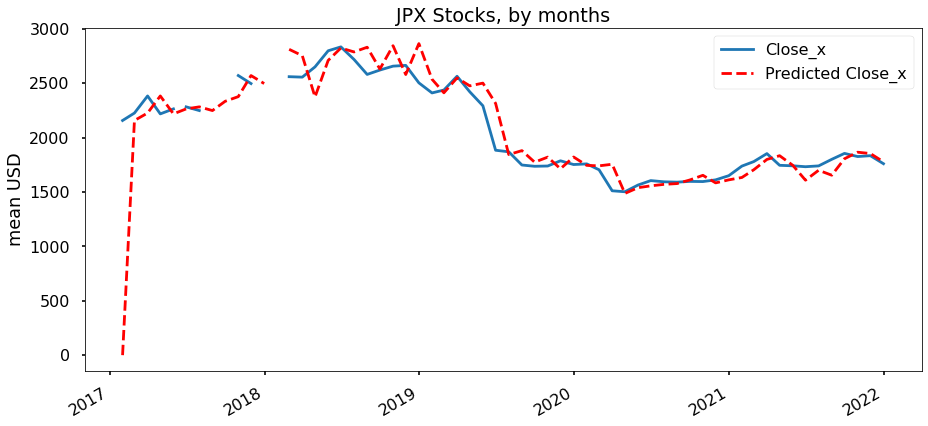

In [43]:
# Prediction
df_month2 = df_sub_month[['Close_x']]
date_list = [datetime(2017, 6, 30), datetime(2017, 7, 31), datetime(2017, 8, 31), datetime(2017, 9, 30), 
             datetime(2017, 10, 31), datetime(2017, 11, 30), datetime(2017, 12, 31), datetime(2018, 1, 31),
             datetime(2018, 1, 28)]
future = pd.DataFrame(index=date_list, columns= df_sub_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
plt.figure(figsize=(15,7))
df_month2.Close_x.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Close_x')
plt.legend()
plt.title('JPX Stocks, by months')
plt.ylabel('mean USD')
plt.show()

#### Randomforest


In [44]:
df_sub.sample(20)

,SecuritiesCode,Open,High,Low,Close_x,Volume,AdjustmentFactor,Target,BOP,WP,HLr,OCr,OC,HL,logC,logR,OHLCstd,OHLCskew,OHLCkur,Cpos,bsforce,Opos,weekday,Monday,Tuesday,Wednesday,Thursday,Friday,SMA5,SMA20,SMA50,SMA200,SMA500,EMA5,EMA20,EMA50,EMA200,EMA500,EffectiveDate,TradeDate,Close_y,IssuedShares,MarketCapitalization
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-20,1316.5,1789.000000,1789.000000,1750.500000,1756.500000,1.564050e+06,1.0,0.000900,0.892857,1771.250000,38.500000,32.500000,4.451654e+06,4.434020e+06,7.199596,-0.024250,20.702305,-0.071705,-5.588909,-0.392857,-778200.000000,0.500000,3.0,0.0,0.0,1.0,0.0,0.0,1674.900000,5653.275000,3910.100000,3123.337500,2689.798200,2287.264707,4708.501972,4336.367490,3388.490223,2905.877600,20211230.0,20211230.0,1811.500000,161679280.0,1.016544e+11
2018-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-08,1316.5,1496.500000,1510.500000,1490.500000,1509.500000,1.065250e+06,1.0,0.002678,-0.617555,1501.750000,20.000000,-13.000000,3.328110e+06,3.320536e+06,7.001080,0.010338,9.884511,-0.445087,-3.420103,0.465517,532190.517241,-0.152038,5.0,0.0,0.0,0.0,0.0,1.0,1518.300000,4651.925000,3300.100000,2668.681071,2277.812240,1949.431199,3864.967160,3599.981988,2828.689165,2404.680602,20211230.0,20211230.0,1811.500000,161679280.0,1.016544e+11
2017-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-08,1322.0,2558.000000,2570.000000,2538.333333,2559.000000,8.004667e+05,1.0,0.000335,-0.100000,2556.333333,31.666667,-1.000000,8.650203e+06,8.617558e+06,7.547404,0.001867,13.446600,-0.645902,1.306467,0.159259,147434.444444,0.059259,4.0,0.0,0.0,0.0,1.0,0.0,2283.066667,4821.741667,3575.868333,2965.578333,2723.202873,2655.374262,4200.886648,3924.971406,3149.869543,2850.219684,20211230.0,20211230.0,2009.333333,125338490.0,1.099829e+11
2021-06-30,1316.5,1721.500000,1728.500000,1711.500000,1712.000000,4.321500e+05,1.0,0.013866,0.493103,1718.375000,17.000000,9.500000,4.355570e+06,4.373202e+06,7.121981,-0.004814,8.185636,0.532793,-2.214212,-0.400000,-130815.000000,0.093103,3.0,0.0,0.0,1.0,0.0,0.0,1712.200000,6694.950000,4278.740000,3202.045000,2750.040800,2433.292527,5391.053511,4821.696405,3511.315904,2987.868270,20211230.0,20211230.0,1811.500000,161679280.0,1.016544e+11
2020-06-10,1316.5,1645.000000,1649.500000,1638.500000,1640.500000,1.010900e+06,1.0,-0.006562,0.346154,1643.375000,11.000000,4.500000,3.956940e+06,3.962711e+06,7.090508,-0.001628,5.121498,0.358294,-1.317445,-0.277778,-58116.666667,0.068376,3.0,0.0,0.0,1.0,0.0,0.0,1631.300000,5635.025000,3842.160000,2944.528500,2518.870240,2193.271630,4616.429976,4231.969205,3229.080652,2730.824623,20211230.0,20211230.0,1811.500000,161679280.0,1.016544e+11
2021-08-16,1316.5,1795.000000,1802.500000,1787.000000,1789.000000,3.112000e+05,1.0,0.017826,0.366667,1793.375000,15.500000,6.000000,4.682620e+06,4.703960e+06,7.184002,-0.003391,7.321483,-0.110195,0.967866,-0.166667,48000.000000,0.200000,1.0,1.0,0.0,0.0,0.0,0.0,1747.000000,6244.700000,4175.840000,3239.095000,2744.065200,2390.488610,5068.070964,4621.365692,3480.337402,2987.564277,20211230.0,20211230.0,1811.500000,161679280.0,1.016544e+11
2019-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
train_test_split_ratio = int(len(df_sub)*0.8)
train_data, test_data = df_sub[:train_test_split_ratio], df_sub[train_test_split_ratio:]


In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import math

### Baseline Model

In [47]:
y_pred = train_data['Open']
y_true = train_data['Close_x']

In [49]:
 
MSE = mean_squared_error(y_true, y_pred)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
RMSE(y_true,y_pred)

0.009728786875897353

In [ ]:
wmape(y_true, y_pred)

0.009785903596379101

In [ ]:
features = ['Open','High','Low','Volume','AdjustmentFactor','Target','BOP','WP']

In [ ]:
imputer = SimpleImputer()
Xtr = imputer.fit_transform(train_data[features])
ytr = train_data ['Close_x']

mdl = RandomForestRegressor(n_estimators=100,random_state=0,n_jobs=6)
mdl.fit(Xtr, ytr)

RandomForestRegressor(n_jobs=6, random_state=0)

In [ ]:
Xval = imputer.transform(train_data[features])
yval = train_data['Close_x']

p = mdl.predict

In [ ]:
MSE = mean_squared_error(yval, p)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

TypeError: Expected sequence or array-like, got <class 'method'>

In [ ]:
mape(yval,p)

TypeError: unsupported operand type(s) for -: 'float' and 'method'

In [ ]:
wmape(yval, p)

TypeError: unsupported operand type(s) for -: 'float' and 'method'

## Notes
### Potential Features

- Earthquakes?